# Primera ejercitación de Laboratorio de Datos (1er cuatrimestre 2022)

***Fecha de entrega de consigna: 6/4/2022***

***Fecha de entrega de resolución: 21/4/2022 a las 23:55 PM***

***Que hay que hacer***: Más abajo hay una serie de consignas para hacer. La idea es que hagan lo que se pide y discutan el sentido de los resultados. **¿Por qué se ve lo que se ve? ¿Tiene sentido? ¿Qué podría implicar? ¿Qué más se podría hacer para responder estas preguntas?** (sin hacer falta que lo hagan).

***Cómo hay que hacerlo***: Cada alumno/a tiene que crear y compartir un notebook individual con la resolución, el cual se llame "Ejercitacion 1" seguido de su nombre y apellido. Es individual. En el campus virtual compartimos instrucciones para la entrega de ejercicios. El notebook tiene que contener código que al ejecutarse haga lo que pedimos, y texto comentando lo que ustedes consideren necesario para que nosotros entendamos lo que hicieron.

***Qué pasa después***: Nosotros evaluamos los notebooks de cada uno, les decimos cómo les fue, y lo tenemos en cuenta para calcular la nota final. El día siguiente a la fecha límite de entrega, publicamos un notebook junto con nuestra resolución de la ejecitación para que puedan comparar con lo que ustedes hicieron.

***Qué hago si no me sale***: Consultarnos las dudas que tengan en el foro de la materia que se encuentra en el campus virtual o en la clases presenciales o de consulta.

***RECUERDEN QUE ES OBLIGATORIO ENTREGAR ALGO***


# Los datos: partidos y jugadores de todos los mundiales hasta Brasil 2014

Estamos en un año de mundial, y si bien podríamos ignorarlo completamente, decidimos no hacerlo. El resultado es la siguiente ejercitación.

Compartimos dos archivos .csv: *WorldCupMatches.csv* y *WorldCupPlayers.csv* (https://drive.google.com/drive/folders/14qGoWAdkwQRS2m55dszWzF3f0eviAS1k?usp=sharing)

El primero de los dos archivos (*WorldCupMatches.csv*) contiene información sobre partidos individuales de cada mundial desde 1930 hasta 2014, con los siguientes campos (en el mismo orden que en el archivo):


*   Año del mundial
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Equipo local
*   Goles del equipo local
*   Equipo visitante
*   Goles del equipo visitante
*   Cantidad de expectadores en el público
*   Condición de la victoria (e.g. si fue por penales)
*   Goles anotados en el primer tiempo
*   Goles anotados en el segundo tiempo
*   Nombre y país del árbitro y los asistentes
*   Un ID único por ronda de mundial y por partido
*   Código de los dos equipos que jugaron el partido

El otro archivo (*WorldCupPlayers.csv*) contiene los jugadores de todos los partidos de todos los mundiales, con los siguientes campos:

*   ID único por ronda de mundial y por partido
*   Iniciales del equipo 
*   Nombre del director técnico
*   Titularidad (S) o suplente (N)
*   Número de camiseta
*   Nombre del jugador
*   Si es arquero (GK) o capitán (C)
*   Eventos asociados al jugador. Solo nos interesan los de la forma *GX'*, *PX'* o *WX'*, que significa que el jugador metió un gol en el minuto X, metió un gol de penal en el minuto X, o bien metió un gol en contra en el minuto X, respectivamente. Hay un evento por gol que haya hecho el jugador en ese partido.

# Primera consigna

1. Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).

2. Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles:

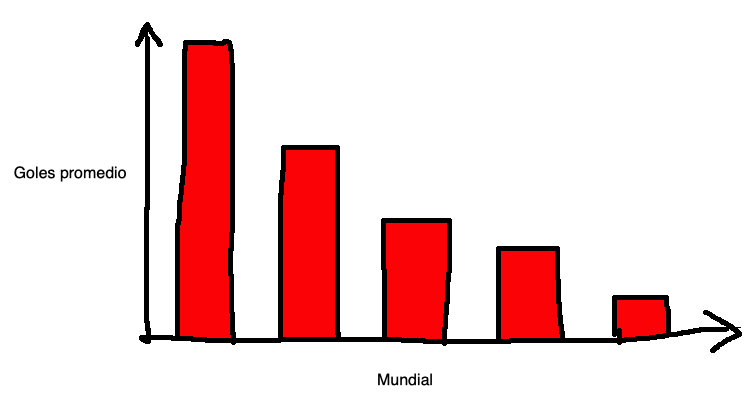

# Segunda consigna

2. Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.

3. ¿Quién fue el arquero que más partidos ganó por penales?

# Tercera consigna

4. Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente. 

5. Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).

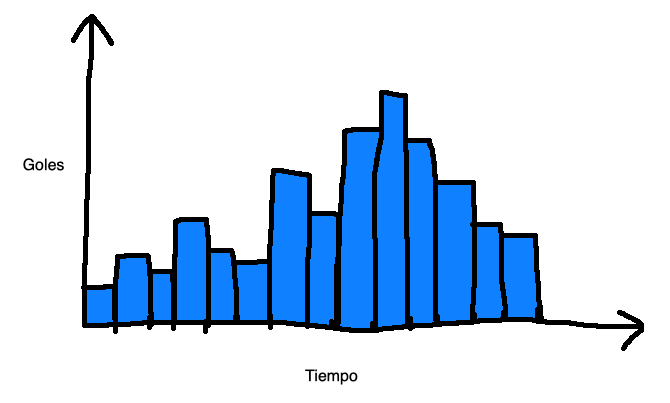

# Cuarta consigna

6. Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. h
Hacer un histograma de la distribución de estos valores.

7. Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.

8. ¿Se parecen estas distribuciones a algunas de las que vimos en clase?


PS: Las ilustraciones con Paint son deliberadas (si un ejemplo no se puede ilustrar fácil con Paint, no se puede ilustrar fácil) - Enzo




---
# Solucion

In [ ]:
# Importo las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def format_column_names(
    df: pd.DataFrame
) -> pd.DataFrame:
    return df.rename(columns = dict(zip(df.columns, map(lambda x: x.lower().replace(' ','_').replace('-','_'), df.columns))))

In [ ]:
# Importo la data del Drive
world_cup_matches = pd.read_csv('/content/drive/MyDrive/UBA/LdD/TP1_datos/WorldCupMatches.csv')
world_cup_matches = format_column_names(world_cup_matches)
world_cup_matches.home_team_name = world_cup_matches.home_team_name.fillna("").apply(lambda x: x.replace('rn">',''))
world_cup_matches.away_team_name = world_cup_matches.away_team_name.fillna("").apply(lambda x: x.replace('rn">',''))
world_cup_players = pd.read_csv('/content/drive/MyDrive/UBA/LdD/TP1_datos/WorldCupPlayers.csv')
world_cup_players = format_column_names(world_cup_players)

In [ ]:
world_cup_matches.head(2)

,year,datetime,stage,stadium,city,home_team_name,home_team_goals,away_team_goals,away_team_name,win_conditions,attendance,half_time_home_goals,half_time_away_goals,referee,assistant_1,assistant_2,roundid,matchid,home_team_initials,away_team_initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [ ]:
world_cup_players.head(2)

,roundid,matchid,team_initials,coach_name,line_up,shirt_number,player_name,position,event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN


# Primer consigna

In [ ]:
# 1. Construir un ranking de los mundiales por cantidad de goles 
#    anotados en promedio por partido (por ejemplo, en una lista).
world_cup_matches['total_goals'] = world_cup_matches['home_team_goals'] + world_cup_matches['away_team_goals']
ranking = world_cup_matches[
    ['year', 'total_goals']
].groupby('year').mean().sort_values(by='total_goals', ascending=False)
ranking = ranking.rename(
    columns={'total_goals': 'mean_total_goals_by_match'}
)

In [ ]:
ranking

,mean_total_goals_by_match
year,
1954.0,5.384615
1938.0,4.666667
1934.0,4.117647
1950.0,4.000000
1930.0,3.888889
1958.0,3.600000
1970.0,2.968750
1982.0,2.807692
1962.0,2.781250


In [ ]:
def plot_ranking(
    x, 
    y, 
    x_label = None, 
    y_label = None, 
    title = None, 
    figsize = (10,8),
    rotation = 45,
):
    fig = plt.figure(figsize=figsize)
    fig = plt.bar(x, y, edgecolor='black')
    plt.xticks(rotation = rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

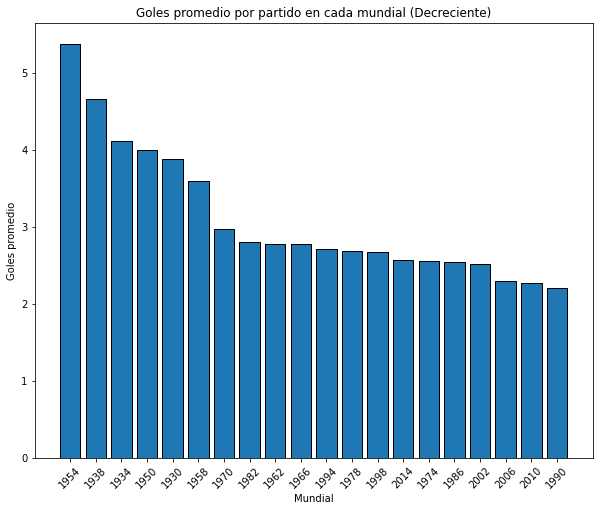

In [ ]:
# 2. Hacer un gráfico de barras donde en el eje Y figura la cantidad 
#    promedio de goles y en el X aparecen los mundiales, ordenados 
#    de izquierda a derecha en cantidad decreciente de goles
years = list(map(lambda x: str(int(x)), ranking.index))
mean_goals = list(ranking.mean_total_goals_by_match)

plot_ranking(
    years,
    mean_goals,
    x_label="Mundial", 
    y_label="Goles promedio", 
    title="Goles promedio por partido en cada mundial (Decreciente)", 
    figsize=(10,8)
)

# Segunda consigna

In [ ]:
# 2. Construir un ranking de los países que más partidos ganaron 
#    por penales. Representarlo en un gráfico igual que en la consigna anterior.
import re
def penalties_winners(x):
    result = tuple(map(int, re.findall(r'(\d)', x.win_conditions)))
    # Si gano el result[0], gano home_team
    if result[0] > result[1]:
      return x.home_team_initials
    return x.away_team_initials


df_2 = world_cup_matches[['year', 'home_team_name', 'home_team_initials', 'away_team_name', 'away_team_initials', 'win_conditions', 'matchid']]
df_2 = df_2[~df_2.matchid.isna()]
df_2['matchid'] = df_2[~df_2.matchid.isna()]['matchid'].astype(int)
df_2['penalties'] = df_2.win_conditions.apply(lambda x: True if "penalties" in x else False)
df_2 = df_2.query('penalties')
df_2['winners'] = df_2.apply(lambda x: penalties_winners(x), axis=1)
df_2 = df_2.drop_duplicates()
ranking_2 = df_2.groupby('winners')[['penalties']].count().sort_values(by='penalties', ascending=False)

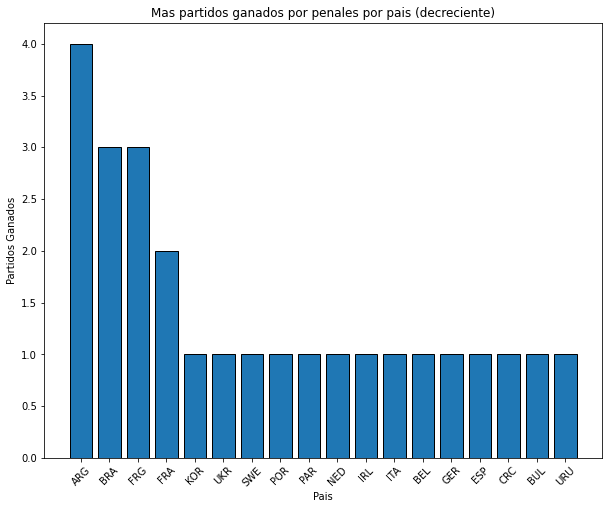

In [ ]:
plot_ranking(
    ranking_2.index,
    ranking_2.penalties,
    x_label="Pais", 
    y_label="Partidos Ganados",
    title="Mas partidos ganados por penales por pais (decreciente)", 
    figsize=(10,8)
)

In [ ]:
# Notar que no todos los matchid's estan en ambas bases de datos, por lo tanto
# al realizar los joins, se van a limpiar varios registros
df2t = world_cup_matches[['year', 'home_team_name', 'home_team_initials', 'away_team_name', 'away_team_initials', 'win_conditions', 'matchid']]
df2t = df2t[~df2t.matchid.isna()]
df2t['penalties_definition'] = df2t.win_conditions.fillna("").apply(lambda x: "penalties" in x)
df2t['matchid'] = df2t['matchid'].astype(int)
df2t = df2t[df2t.penalties_definition]
df2t['winners'] = df2t.apply(lambda x: penalties_winners(x), axis=1)
mwp = df2t[['matchid','winners']]

In [ ]:
def played_game(series):
  events = str(series.event)
  if series.line_up == "S":
    if "O" in events:
      return False
    return True
  elif series.line_up == "N" and "I" in events:
    return True
  else:
    return False

In [ ]:
goalkeepers = world_cup_players.query("position in ('GK', 'GKC')")
goalkeepers['played_game'] = goalkeepers.apply(played_game, axis=1)
gk_that_played = goalkeepers[goalkeepers.played_game]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pd.merge(
    mwp,
    gk_that_played[['matchid','team_initials','player_name']],
    left_on=['matchid', 'winners'],
    right_on=['matchid', 'team_initials'],
).drop_duplicates().groupby('player_name')[['matchid']].count().sort_values(by='matchid', ascending=False).head(4)

,matchid
player_name,
TAFFAREL,2
Sergio GOYCOCHEA,2
Harald SCHUMACHER,2
BUFFON,1


# Tercer consigna

In [ ]:
# 4. Construir un histograma que muestra como están distribuidos los goles a lo 
#    largo de la duración de un partido. Es decir, armar un gráfico que divida 
#    los '90 minutos de un partido en bines de 4 minutos en el eje X, y que 
#    tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente.
match_events = world_cup_players[['matchid','event']].fillna("")
match_events['goals'] = match_events['event'].apply(lambda x: list(filter(lambda y: ("G" in y), [i for i in x.replace("'","").split(' ')])))
match_events['goals'] = match_events['goals'].apply(lambda x: None if len(x) == 0 else list(map(lambda y: int(y.replace("G", "")), x)))
match_events_goals = match_events[~match_events.goals.isna()]

goals_array = list(map(lambda x: np.array(x), match_events_goals.goals.to_numpy()))
goals_hist_data = np.array([item for sublist in goals_array for item in sublist])

bins = [i + 4 for i in range(-4, 90, 4)]

In [ ]:
def plot_histogram(
    data,
    bins,
    x_label = None, 
    y_label = None, 
    title = None, 
    figsize = (10,8),
    rotation = 45,
    **kwargs
):
    fig = plt.figure(figsize=figsize)
    fig = plt.hist(data, edgecolor='black', bins=bins, **kwargs)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

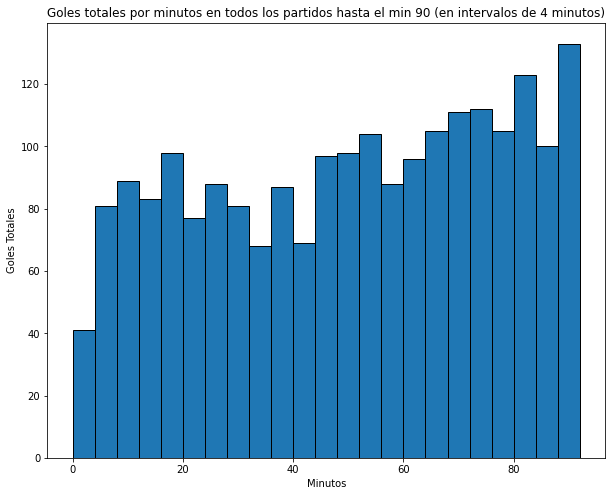

In [ ]:
plot_histogram(
    goals_hist_data,
    bins,
    x_label = 'Minutos', 
    y_label = 'Goles Totales', 
    title = 'Goles totales por minutos en todos los partidos hasta el min 90 (en intervalos de 4 minutos)', 
    figsize = (10,8),
)

In [ ]:
# 5. Hacerlo por separado para la fase de grupos y para la fase de 
#    eliminación (todos los partidos posteriores a la fase de grupos).
group_stage_matches = world_cup_matches[['stage','matchid']]
group_stage_matches = group_stage_matches[~group_stage_matches.matchid.isna()]
group_stage_matches['is_group_stage'] = group_stage_matches.stage.apply(lambda x: "Group" in x)

In [ ]:
non_group_stage_matches = group_stage_matches[~group_stage_matches.is_group_stage]
non_group_stage_matches = non_group_stage_matches.merge(match_events_goals[['matchid','goals']], on='matchid')
group_stage_matches = group_stage_matches[group_stage_matches.is_group_stage]
group_stage_matches = group_stage_matches.merge(match_events_goals[['matchid','goals']], on='matchid')

In [ ]:
groups_array = list(map(lambda x: np.array(x), group_stage_matches.goals.to_numpy()))
groups_hist_data = np.array([item for sublist in groups_array for item in sublist])

non_groups_array = list(map(lambda x: np.array(x), non_group_stage_matches.goals.to_numpy()))
non_groups_hist_data = np.array([item for sublist in non_groups_array for item in sublist])

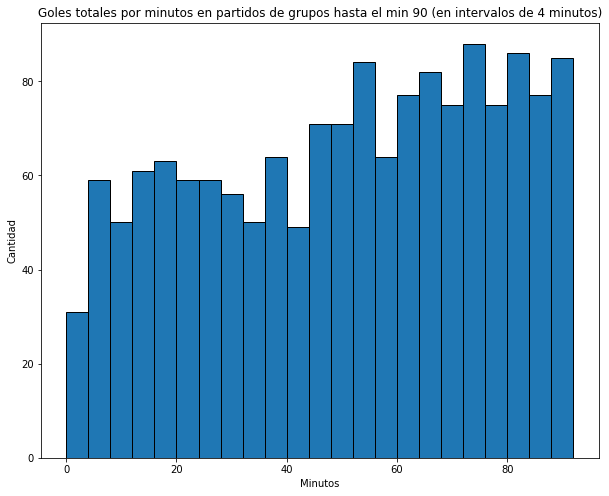

In [ ]:
plot_histogram(
    groups_hist_data,
    bins,
    x_label = 'Minutos', 
    y_label = 'Cantidad', 
    title = 'Goles totales por minutos en partidos de grupos hasta el min 90 (en intervalos de 4 minutos)', 
    figsize = (10,8),
)

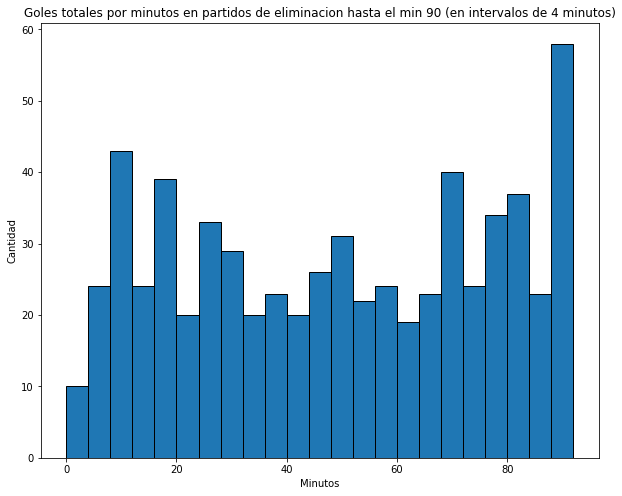

In [ ]:
plot_histogram(
    non_groups_hist_data,
    bins,
    x_label = 'Minutos', 
    y_label = 'Cantidad', 
    title = 'Goles totales por minutos en partidos de eliminacion hasta el min 90 (en intervalos de 4 minutos)', 
    figsize = (10,8),
)

# Cuarta Consigna

In [ ]:
# 6. Para los partidos en los que hubo al menos algún gol, obtener el tiempo que
#    transcurrió hasta el primer gol. h Hacer un histograma de la distribución 
#    de estos valores.

In [ ]:
import itertools

def is_goal(elem):
  try:
    r = int(elem)
    return True
  except:
    return False

def parse_goals(events):
  ll = []
  for e in events:
    for c in ["'", "G", "P", "W"]:
      e = e.replace(c, '')

    ll.append(e)
  return ll

In [ ]:
ttt = world_cup_players[['matchid','event']][~world_cup_players.event.isna()]
ttt['event'] = ttt.event.apply(lambda x: x.split(' '))
cosas = ttt.groupby('matchid')['event'].sum().reset_index()
cosas['event_goals'] = cosas.event.apply(parse_goals)
cosas['event_goals_int'] = cosas.event_goals.apply(lambda x: list(filter(is_goal, x)))
cosas['total_goals'] = cosas.event_goals_int.apply(len)

In [ ]:
cosas.query("total_goals > 1")

,matchid,event,event_goals,event_goals_int,total_goals
3,28,"[O99', OH46', G67', Y82', Y30', Y103', RSY103'...","[O99, OH46, 67, Y82, Y30, Y103, RSY103, Y22, O...","[67, 17]",2
4,29,"[Y86', O60', G62', Y4', O82', Y73', Y8', G68',...","[Y86, O60, 62, Y4, O82, Y73, Y8, 68, O72, O53,...","[62, 68]",2
5,30,"[O11', R48', Y73', G79', Y57', Y70', O80', Y77...","[O11, R48, Y73, 79, Y57, Y70, O80, Y77, O78, O...","[79, 27]",2
9,48,"[Y84', Y31', Y28', O55', Y58', Y21', R33', OH4...","[Y84, Y31, Y28, O55, Y58, Y21, R33, OH46, 49, ...","[49, 63, 83]",3
11,56,"[O31', O82', G38', O78', O88', G29', P26', I88...","[O31, O82, 38, O78, O88, 29, 26, I88, I82, I31...","[38, 29, 26]",3
...,...,...,...,...,...
820,300186508,"[Y90', O9', O76', G88', G48', O61', OH46', O56...","[Y90, O9, O76, 88, 48, O61, OH46, O56, Y90, O7...","[88, 48, 90, 88, 48, 90]",6
822,300186510,"[Y65', Y41', G65', O77', P27', O62', Y25', O62...","[Y65, Y41, 65, O77, 27, O62, Y25, O62, O62, 44...","[65, 27, 44, 72, 53, 80]",6
824,300186512,"[OH46', O78', G82', G1', Y90', O77', O59', Y30...","[OH46, O78, 82, 1, Y90, O77, O59, Y30, O71, O2...","[82, 1, 86]",3
825,300186513,"[O79', G35', G50', O73', G37', O80', O61', O73...","[O79, 35, 50, O73, 37, O80, O61, O73, Y90, O57...","[35, 50, 37]",3


In [ ]:
t_to_firstgoal = []
for k,v in cosas.query("total_goals > 1").iterrows():

  l = list(map(int, v.event_goals_int))
  l.sort()
  t_to_firstgoal.append(int(l[0]))

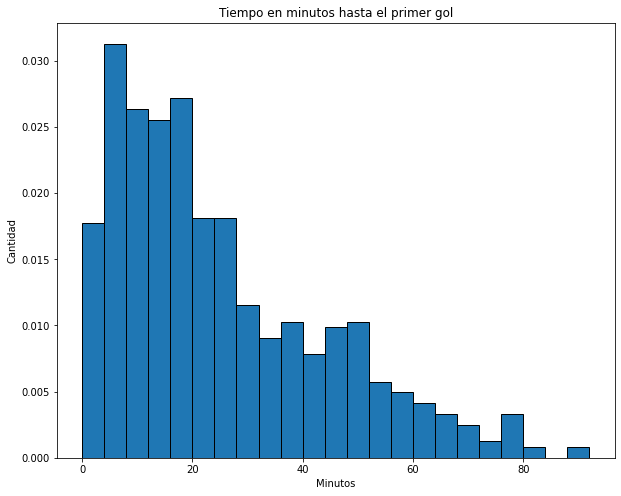

In [ ]:
plot_histogram(
    t_to_firstgoal,
    bins,
    x_label = 'Minutos', 
    y_label = 'Cantidad', 
    title = 'Tiempo en minutos hasta el primer gol', 
    figsize = (10,8),
    density = True,
)

In [ ]:
match_events['total'] = match_events['event'].apply(len)

In [ ]:
def join_zero(events, c=','):
  l = []
  for i in events:
    if i != '0' and i != 0 and i!='':
      l.append(str(i))
  return l

test = world_cup_players[['matchid','event']].fillna('0')
test['event'] = test['event'].apply(lambda x: ','.join(list(filter(is_goal, parse_goals(x)))))

In [ ]:
# 7. Para los partidos en los que hubo más de un gol, obtener los tiempos 
#    transcurridos entre goles. Hacer un histograma de la distribución de estos valores.
t_between_goals = []
for k,v in cosas.query("total_goals > 1").iterrows():

  l = list(map(int, v.event_goals_int))
  l.sort()

  for e in [j-i for i, j in zip(l[:-1], l[1:])]:
    t_between_goals.append(e)

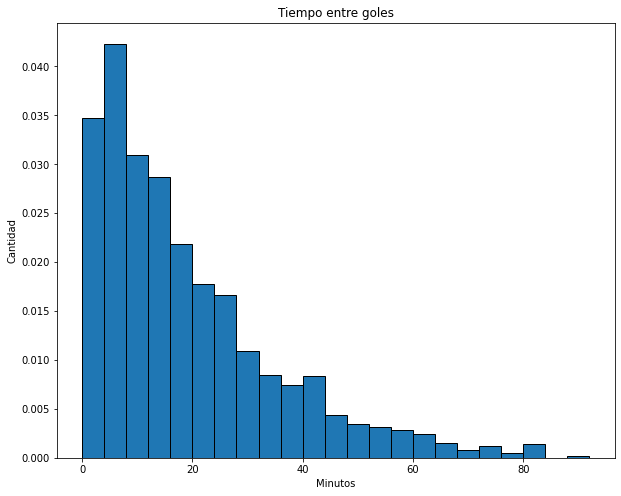

In [ ]:
plot_histogram(
    t_between_goals,
    bins,
    x_label = 'Minutos', 
    y_label = 'Cantidad', 
    title = 'Tiempo entre goles',
    figsize = (10,8),
    density = True
)

In [ ]:
t_between_goals.__len__()

1648

In [ ]:
# 8. ¿Se parecen estas distribuciones a algunas de las que vimos en clase?
# En el primer caso se parece a una distribucion de poisson. 
# Lo que se puede notar es que los datos son left-skewed

# En el segundo caso lo mas parecido que me parecio es una distribucion Gamma.
# 